# 誤差逆伝播法 - Backpropagation -

機械学習において、ニューラルネットワーク（以下、NN）を学習させる際に用いられるアルゴリズムの一つ。

以下の二つのアルゴリズムによって実現されている。

- 連鎖律  
  合成関数の微分なので高校数学問題
- 最急降下法  
  関数$f(x)$が最小値を取るときの変数$x$の値を１階導関数のみを使って求める方法

## 大まかな手順

1. NNに学習のためのサンプルデータを入力する。
2. ノードを出力していき、ネットワーク全体の出力を求める。（順伝播）
3. 出力層の各ノードについて、計算結果と期待値との誤差を算出する。
4. 個々のノードの期待される出力地と倍率、要求された出力と実際の出力の差（局所誤差）を算出する。（逆伝播）
5. 各ノードの重みを局所誤差が小さくなるように調整する。
6. より大きな重みで接続された前段のノードに対して、局所誤差の調整を行う。

## 必要・十分条件

### 総層数が3層以上であること

少なくとも一層以上の中間層（隠れ層）が必要とWikipediaに書いてあるけど、よくわからん。

> 別に入出力層の2層構造でもいいような気がするし、2層での論文発表が最初じゃなかったっけ？

### 微分可能であること

出力結果を微分することで前段に伝達していく方法のため、結果が微分可能であることが求められる。  
そのため、各層の入力値と重みの線形化演算のあとに非線形な活性化関数が必要とされる。

活性化関数が非線形である必要性だが、活性化関数が線形である場合は単層のNNで書き換え可能であることが証明されているためである。  
つまり、表現力を強化するために層数を増やしたのに、単層と等価なネットワークになるという残念な結果になる。

# 微分とは？

微分とは瞬間の変化を捉える計算式である。
よく用いられるのは速度。

|$x$|$x^2$|
|:--:|:--:|
|1sec|1m|
|2sec|4m|
|3sec|9m|
|4sec|16m|
|5sec|25m|

3秒後から$h$秒間の平均速度を求めると

$
\begin{align}
\frac{f(3+h) - f(a)}{h}
&= (3 + h)^2 - 3^2\\
&= 3^2 + 2\cdot3h + h^2 - 3^2\\
&= h^2 + 6h
\end{align}
$

ここで、$h$を限りなく$0$に近づけていくとどうなるか。

|$x$[sec]|$x^2$[m]|3秒からの平均速度[m/sec]|
|:--:|:--:|:--:|
|5|25|8|
|4|16|7|
|3.1|9.61|6.1|
|3.01|9.0601|6.01|
|3.001|9.006001|6.001|

$3$秒後から$3.00000\cdots$秒後までの平均速度とは、もう$3$秒時点での瞬間の速度とも捉えることができる。

$f'(x) = 2x$なので$6m/sec$であり、確かに表の$6.001$などと一致する。

この計算式では$x^2$を時間変数$x$で微分し、係数2（微分係数ではないよ）を割り出した。  
それは**時間の変化が結果にどれだけの影響力を持つか**を求めたことに等しい。

> 今回は2乗の式なので、時間変数$x$の変化が速度に2倍の影響をもたらすことが分かった。

これを次の式にも当てはめていく。

# 誤差逆伝播の具体例

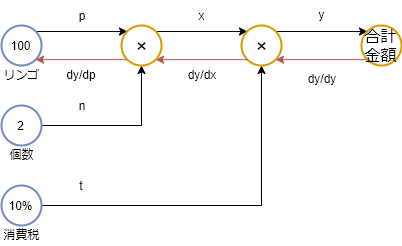

|変数名|意味|変数名|意味|
|:--:|:--|:--:|:--|
|$p$|リンゴの単価(price)|$\frac{dy}{dp}$|$y$における$p$の影響力|
|$n$|購入数(number)|$\frac{dy}{dn}$|$y$における$n$の影響力|
|$t$|消費税(tax)|$\frac{dy}{dt}$|$y$における$t$の影響力|
|$x$|税抜き小計|$\frac{dy}{dx}$|$y$における$x$の影響力|
|$y$|税込み合計|$\frac{dy}{dy}$|$y$における$y$の影響力|

## 計算式$y$について、$y$の影響度は？


$
\frac{dy}{dy} = 1
$

同じ計算式なので等倍が返る。

## 計算式$y$について、消費税$t$の影響度は？

$
\begin{align}
\frac{dy}{dt}
&= \frac{d}{dt}(y \cdot t)\\
&= y
\end{align}
$

消費税の変動で$y$倍の影響がある。  

> 現状のパラメータでは、200倍の影響があることを示す。  
> 消費税が$1.1$から$1.2$に値上がりしたとすると、$0.1 \times 200 = 20$円値上がりする。

## 計算式$y$について、税抜き小計$x$の影響度は？

$
\begin{align}
\frac{dy}{dx}
&= \frac{d}{dx}(x \cdot t)\\
&= t
\end{align}
$

$y = pnt$であるため、$x = pn$で微分すると、残るのは任意の消費税$t$のみとなる。  
つまり、税抜き小計が変化することで合計に影響されるのは消費税分のみといのは分かり易い。

## 計算式$y$について、単価$p$の影響度は？

$
\begin{align}
\frac{dy}{dp}
&= \frac{dx}{dp} \cdot \frac{dy}{dx}\\
&= \frac{d}{dp}(p \cdot n) \cdot \frac{dy}{dx}\\
&= n \cdot t
\end{align}
$

単価の変動がもたらす影響度は購入数$n$と消費税$t$の積となる。  

> 現状では合計金額に2.2倍の影響があるということを示す。  
> 単価が100から200に値上がりしたとすると、$100 \times 2.2 = 220$円値上がりする。

## 計算式$y$について、購入数$n$の影響度は？

$
\begin{align}
\frac{dy}{dn}
&= \frac{dx}{dn} \cdot \frac{dy}{dx}\\
&= \frac{d}{dn}(p \cdot n) \cdot \frac{dy}{dx}\\
&= p \cdot t
\end{align}
$

購入数の変動がもたらす影響度は単価$p$と消費税$t$の積となる。

> 現状のパラメータでは、合計金額に110倍の影響があることを示す。  
> 購入数が2から5に上がったとして、$3 \times 110 = 330$円値上がりする。

# 参考：活性化関数の形

各活性化関数の形を見てみる。

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plot_function(func, x):
    y = func(x)
    plt.title(func.__name__)
    plt.grid()
    graph_margin = 0.2
    plt.hlines(0, min(x), max(x), "black")
    plt.vlines(0, min(y)-graph_margin, max(y), "black")
    plt.plot(x, y)
    plt.show()

In [3]:
x_min, x_max = -10, 10
x = np.linspace(x_min, x_max, int(x_max - x_min) * 10 + 1)
x

array([-10. ,  -9.9,  -9.8,  -9.7,  -9.6,  -9.5,  -9.4,  -9.3,  -9.2,
        -9.1,  -9. ,  -8.9,  -8.8,  -8.7,  -8.6,  -8.5,  -8.4,  -8.3,
        -8.2,  -8.1,  -8. ,  -7.9,  -7.8,  -7.7,  -7.6,  -7.5,  -7.4,
        -7.3,  -7.2,  -7.1,  -7. ,  -6.9,  -6.8,  -6.7,  -6.6,  -6.5,
        -6.4,  -6.3,  -6.2,  -6.1,  -6. ,  -5.9,  -5.8,  -5.7,  -5.6,
        -5.5,  -5.4,  -5.3,  -5.2,  -5.1,  -5. ,  -4.9,  -4.8,  -4.7,
        -4.6,  -4.5,  -4.4,  -4.3,  -4.2,  -4.1,  -4. ,  -3.9,  -3.8,
        -3.7,  -3.6,  -3.5,  -3.4,  -3.3,  -3.2,  -3.1,  -3. ,  -2.9,
        -2.8,  -2.7,  -2.6,  -2.5,  -2.4,  -2.3,  -2.2,  -2.1,  -2. ,
        -1.9,  -1.8,  -1.7,  -1.6,  -1.5,  -1.4,  -1.3,  -1.2,  -1.1,
        -1. ,  -0.9,  -0.8,  -0.7,  -0.6,  -0.5,  -0.4,  -0.3,  -0.2,
        -0.1,   0. ,   0.1,   0.2,   0.3,   0.4,   0.5,   0.6,   0.7,
         0.8,   0.9,   1. ,   1.1,   1.2,   1.3,   1.4,   1.5,   1.6,
         1.7,   1.8,   1.9,   2. ,   2.1,   2.2,   2.3,   2.4,   2.5,
         2.6,   2.7,

## Sigmoid関数

シグモイド曲線を持つロジスティック関数の一種。

sigmoid関数とsoftmax関数は常に出力値が$(0,1)$の領域に属しているので、確率と関係させることが多い。  
Deep Belief NetやDeep Boltzmann machineはもはやオバケ。

In [4]:
def Sigmoid(x):
    return 1 / (1 + np.exp(-x))

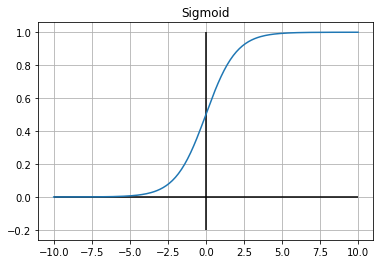

In [5]:
plot_function(Sigmoid, x)

## 正規化線形関数 - Rectified Linear Unit -

通称、ReLU。

関数自体の表現力が乏しいため、出力層で使われることはほぼない。  
ただし、ロジスティック関数に比べて勾配消失問題が発生しにくいことが分かっているため隠れ層にご用達状態。  
隠れ層の活性化関数に迷ったら、とりあえずReLU試しとけみたいな風潮あるよね。

<details>
    <summary>線形型の活性化関数？</summary>
    
おいおい、活性化関数には非線形型が選ばれるんじゃなかったのかよ！？と思うかもしれない。  
確かに下のグラフを見ても分かるように、ReLUは数学上$x=0$で微分不可能であることが明らかである。  

そこでプログラム上、以下の定義を行うことで疑似的に微分可能ということにしている。  

$
\frac{df}{dx} = \left\{
\begin{array}{ll}
1 & (x \geq 0) \\
0 & (x \lt 0)
\end{array}
\right.
$

このような一般の微分の概念を微分不可能な関数に対して拡張した考えを[劣微分](https://ja.wikipedia.org/wiki/%E5%8A%A3%E5%BE%AE%E5%88%86)と呼ぶ。  
> 正直、これは死ぬほど調べた。

<details>
    <summary>微分不可能の証明</summary>

$
\begin{align}
lim_{h\rightarrow0}f(x+h)
&= \frac{f(x+h) - f(h)}{(x+h) - h}\\
&= \frac{max(x+h) - max(h)}{h}
\end{align}
$

$x$が正方向から$0$に近づく場合は$1$に、負方向から$0$に近づく場合は$0$となる。  
よって、極限値は存在し得ない。  
つまり、微分不可能である。
</details>
</details>

In [6]:
def ReLU(x):
    return np.maximum(x, 0)

**最大値関数の選択について**

Pythonには最大値を演算する関数が複数あるが、正しく選択するように。  
今回は、別に最大値を返してほしいんじゃなくて、各要素に$max(0,x)$の演算を行いたいということを忘れずに。

<details>
    <summary>いろんなMax関数</summary>

|関数名|演算内容|補足|
|:--:|:---|:--|
|max|単一変数同士の比較を行う。||
|numpy.amax|配列から最大値を検索する。|`numpy.amax(instance)`の記述形式|
|numpy.ndarray.max|配列から最大値を検索する。|`instance.max()`の記述形式|
|numpy.maximum|各要素にmax処理を行う。||

</details>

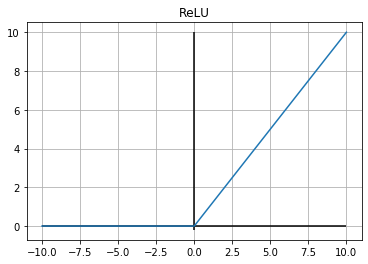

In [7]:
plot_function(ReLU, x)

## Softmax関数

分類問題において、NNの出力層にだけ用いられる活性化関数。

各クラスの値を正規化（$0～1$の範囲に収める）しているだけだが、その特徴から確率値として運用されることが多い。

> これ、今回は回帰問題なのでグラフ化しても意味不明では……一応やっとくか

In [8]:
def Softmax(x):
    return np.exp(x) / sum(np.exp(x))

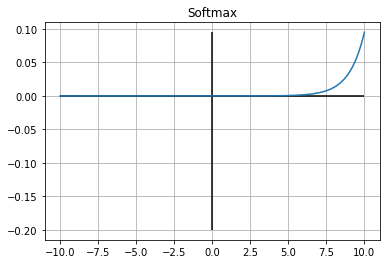

In [9]:
plot_function(Softmax, x)